In [1676]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm

In [1677]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df = pd.read_csv("./berlin-airbnb-data/listings_summary.csv")

In [1678]:
# #source : https://www.kaggle.com/mhmdpkts/predict-price-ann-data-cleaning-future-engineering
# fig, ax = plt.subplots(figsize = (20, 5))
# sns.heatmap(df.isna(), cmap = "cubehelix_r", yticklabels='')
# plt.show()

In [1679]:
#Sort out the Price-Section

df.price = df.price.str.replace('$', '').str.replace(',', '').astype(float)
df.cleaning_fee = df.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float)
df.security_deposit = df.security_deposit.str.replace('$', '').str.replace(',', '').astype(float)
df.extra_people = df.extra_people.str.replace('$', '').str.replace(',', '').astype(float)

df['cleaning_fee'].fillna(0, inplace=True)
df['security_deposit'].fillna(0, inplace=True)
#  + df['cleaning_fee'] + df['security_deposit']
df['total_price'] = df['price']
df.drop(['price'], inplace=True, axis = 1)

In [1680]:
# df['total_price'] = np.log1p(df['total_price']).astype(float)

In [1681]:
def nan_checker(df):
    df_nan = pd.DataFrame([[var, df[var].isna().sum() / df.shape[0], df[var].dtype]
                           for var in df.columns if df[var].isna().sum() > 0],
                          columns=['var', 'proportion', 'dtype'])
    return df_nan

In [1682]:
#removing 100% of the NULL values and identity values
col_list_to_drop = [] 
columns = df.columns
df_nan = nan_checker(df)
length = len(df)
for col in df.columns:  
    if (df[col].dtype != 'float64'and df[col].nunique(dropna=True) == df[col].notnull().sum()):
        col_list_to_drop.append(col)
df.drop(col_list_to_drop, inplace=True, axis = 1)

In [1683]:
df_nan = nan_checker(df)
# df_nan

In [1684]:
for row in df_nan.iterrows():
    column_name = row[1]['var']
    rate = round(row[1]['proportion'], 3)
    if rate > 0.5:
        df.drop(column_name, inplace=True, axis = 1)

In [1685]:
df.describe(include="all")

,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,transit,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,total_price
count,2.255200e+04,22552,22493,21589,14020,22349,22552,11540,13036,11449,22552,2.255200e+04,22552,22526,22526,22436,22526,22526,22526,17458,22526.000000,22526.000000,22552,22526,22526,22552,21421,22552,22552,22547,22468,21896,22489,22552,22552,22552,22552.000000,22552.000000,22552,22552,22552,22552.000000,22520.000000,22534.000000,22512.000000,22552,22552,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,2.255200e+04,22552,22552,22552.000000,22552.000000,22552.000000,22552.000000,22552,22552.000000,18638,18644,18163.000000,18138.000000,18141.000000,18120.000000,18134.000000,18121.000000,18117.000000,22552,22552,22552,22552,22552,22552,22552.000000,18638.000000,22552.000000
unique,NaN,2,21873,21041,13598,21997,1,10781,12308,10350,22465,NaN,19180,5997,2914,1036,2,19100,19100,181,NaN,NaN,301,2,2,86,91,136,12,60,19,215,6,61,1,1,NaN,NaN,2,33,3,NaN,NaN,NaN,NaN,5,19985,NaN,NaN,NaN,NaN,NaN,NaN,75,1,NaN,NaN,NaN,NaN,2,NaN,2228,1312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,5,2,2,NaN,NaN,NaN
top,NaN,2018-11-07,Berlin Wohnung,"with en-suite bathroom, TV, WIFI, bed linen, a...",The Singer 109 Hostel is located in the heart ...,We are located in one of the most colorful dis...,none,Welcome Traveler. The Singer Hostel and Apart...,U-Bahn / Underground /Subway / Metro: U5 (Stra...,- No shoes in the house,https://a0.muscache.com/im/pictures/e62cc6e1-c...,NaN,https://www.airbnb.com/users/show/1625771,Anna,2013-08-19,"Berlin, Berlin, Germany",f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,Neukölln,NaN,NaN,"['email', 'phone', 'reviews']",t,f,"Berlin, Berlin, Germany",Neukölln,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,Berlin,Berlin,10245,Berlin,"Berlin, Germany",DE,Germany,NaN,NaN,t,Apartment,Private room,NaN,NaN,NaN,NaN,Real Bed,{},NaN,NaN,NaN,NaN,NaN,NaN,today,t,NaN,NaN,NaN,NaN,2018-11-07,NaN,2017-05-28,2018-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,f,flexible,f,f,NaN,NaN,NaN
freq,NaN,22549,14,14,41,12,22552,43,26,30,3,NaN,45,216,51,17188,19515,56,56,2556,NaN,NaN,4103,22470,13824,22317,3209,1325,5497,22417,22417,855,22483,22419,22552,22552,NaN,NaN,16776,20225,11534,NaN,NaN,NaN,NaN,21766,75,NaN,NaN,NaN,NaN,NaN,NaN,2517,22552,NaN,NaN,NaN,NaN,22549,NaN,116,618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22544,15518,22552,9102,22396,22273,NaN,NaN,NaN
mean,2.018111e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.403355e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.330685,2.330685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.509824,13.406107,NaN,NaN,NaN,2.637460,1.092695,1.161134,1.620558,NaN,NaN,118.284454,18.253991,1.332121,8.257716,7.157059,1.030505e+05,NaN,NaN,4.944173,11.146639,20.016096,79.852829,NaN,17.840679,NaN,NaN,94.413863,9.663965,9.324955,9.713521,9.730672,9.505491,9.411106,NaN,N

We will not need columns containing the following types of data-for our analysis


columns with only true/false values
columns that have text (not within the scope of our analysis)
columns containing personnel information, except for the ones that guranntee some kind of assurance(licence, or profile pictures)

Make everything as relevant, unless it is really irrelevant to your prediction.

In [1686]:
review_host_text_columns =["scrape_id",
                           "picture_url",
                           "last_scraped",
                           "name",
                           "summary", 
                           "space",
                           "description",
                           "experiences_offered", 
                           "neighborhood_overview",
                           "transit",
                           "house_rules", 
                           "host_id",
                           "host_url",
                           "host_location",
                           "host_neighbourhood",
                           "host_name",
                           "host_since", 
                           "host_thumbnail_url",
                           "host_picture_url",
                           "host_listings_count",
                           "host_total_listings_count", 
                           "host_verifications",
                           "calendar_updated",
                           "has_availability",
                           "availability_30",
                           "availability_60",
                           "availability_90",
                           "calendar_last_scraped",
                           "number_of_reviews",
                           "first_review",
                           "last_review",
                           "review_scores_rating",
                           "review_scores_accuracy",
                           "review_scores_cleanliness",
                           "review_scores_checkin",
                           "review_scores_communication",
                           "review_scores_location",
                           "review_scores_value",
                           "calculated_host_listings_count", 
                           "reviews_per_month"]

df_dropped = df.drop(review_host_text_columns, inplace=False, axis = 1).copy(deep=True)
df_dropped.describe(include="all")

,host_is_superhost,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,total_price
count,22526,22526,22526,22552,21421,22552,22552,22547,22468,21896,22489,22552,22552,22552,22552.000000,22552.000000,22552,22552,22552,22552.000000,22520.000000,22534.000000,22512.000000,22552,22552,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,2.255200e+04,22552.000000,22552,22552,22552,22552,22552,22552,22552.000000
unique,2,2,2,86,91,136,12,60,19,215,6,61,1,1,NaN,NaN,2,33,3,NaN,NaN,NaN,NaN,5,19985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,5,2,2,NaN
top,f,t,f,"Berlin, Berlin, Germany",Neukölln,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,Berlin,Berlin,10245,Berlin,"Berlin, Germany",DE,Germany,NaN,NaN,t,Apartment,Private room,NaN,NaN,NaN,NaN,Real Bed,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,f,flexible,f,f,NaN
freq,19515,22470,13824,22317,3209,1325,5497,22417,22417,855,22483,22419,22552,22552,NaN,NaN,16776,20225,11534,NaN,NaN,NaN,NaN,21766,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22544,15518,22552,9102,22396,22273,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.509824,13.406107,NaN,NaN,NaN,2.637460,1.092695,1.161134,1.620558,NaN,NaN,118.284454,18.253991,1.332121,8.257716,7.157059,1.030505e+05,79.852829,NaN,NaN,NaN,NaN,NaN,NaN,67.143668
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030825,0.057964,NaN,NaN,NaN,1.510548,0.329894,0.646156,1.174840,NaN,NaN,304.232661,28.172816,0.835034,11.151069,40.665073,9.640519e+06,119.368162,NaN,NaN,NaN,NaN,NaN,NaN,220.266210
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.345803,13.103557,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.489065,13.375411,NaN,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000e+01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,30.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.509079,13.416779,NaN,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,0.000000,10.000000,1.000000,5.000000,2.000000,1.124000e+03,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,45.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.532669,13.439259,NaN,NaN,NaN,3.000000,1.000000,1.000000,2.000000,NaN,NaN,150.000000,30.000000,1.000000,15.000000,4.000000,1.125000e+03,129.000000,NaN,NaN,NaN,NaN,NaN,NaN,70.000000


<h3>Work on the Missing Data</h3>
 1) Strategy 1 Drop all missing rows and check the outcome
 
 2) Strategy 2 Impute the missing values with mean or most repetative element


In [1687]:
#Strategy 1 
df_dropped_rows = df_dropped.dropna()
percentange_of_rows_dropped = (len(df_dropped) - len(df_dropped_rows))/len(df_dropped)
print("Percentage of Rows Dropped  {}".format(percentange_of_rows_dropped * 100))

Percentage of Rows Dropped  8.832919474991131


In [1688]:
df_nan = nan_checker(df_dropped_rows)
df_nan

,var,proportion,dtype


In [1689]:
#strategy 2 Imputing all the values
from sklearn.impute import SimpleImputer
#filling all the missing values with mean
numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
category__imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")


In [1699]:
df_dropped_imputed = df_dropped_rows.copy(deep=True)
df_nan = nan_checker(df_dropped_imputed)
# df_nan

In [1700]:
for row in df_nan.iterrows():
    column_name = row[1]['var']
    if df_dropped_imputed[column_name].dtype == 'float64':
        df_dropped_imputed[column_name] = numerical_imputer.fit_transform(df_dropped_imputed[[column_name]])
    else:
        df_dropped_imputed[column_name] = category__imputer.fit_transform(df_dropped_imputed[[column_name]])

In [1701]:
df_nan = nan_checker(df_dropped_imputed)
df_nan

,var,proportion,dtype


<h1> Null Data Removed for all columns </h1>

In [1702]:
#decide between strategy 1 or 2
df_na_filtered = df_dropped_imputed.copy(deep=True)

In [1703]:
df_na_filtered.describe(include="all")

,host_is_superhost,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,total_price
count,20560,20560,20560,20560,20560,20560,20560,20560,20560,20560,20560,20560,20560,20560,20560.000000,20560.000000,20560,20560,20560,20560.000000,20560.000000,20560.000000,20560.000000,20560,20560,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,2.056000e+04,20560.000000,20560,20560,20560,20560,20560,20560,20560.000000
unique,2,2,2,74,91,136,12,53,18,215,6,53,1,1,NaN,NaN,2,32,3,NaN,NaN,NaN,NaN,5,18254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,5,2,2,NaN
top,f,t,f,"Berlin, Berlin, Germany",Neukölln,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,Berlin,Berlin,10245,Berlin,"Berlin, Germany",DE,Germany,NaN,NaN,t,Apartment,Private room,NaN,NaN,NaN,NaN,Real Bed,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,f,flexible,f,f,NaN
freq,17729,20510,12660,20428,3051,1189,4995,20450,20518,800,20554,20450,20560,20560,NaN,NaN,15831,18418,10481,NaN,NaN,NaN,NaN,19851,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20552,14053,20560,8346,20421,20306,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.509852,13.406268,NaN,NaN,NaN,2.649854,1.092096,1.161381,1.628551,NaN,NaN,116.849222,18.154280,1.334922,8.238862,7.152967,9.789481e+04,78.180934,NaN,NaN,NaN,NaN,NaN,NaN,67.202335
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030873,0.058062,NaN,NaN,NaN,1.520524,0.329409,0.644830,1.174627,NaN,NaN,298.379970,25.109665,0.843793,11.179855,41.744397,9.862627e+06,118.610591,NaN,NaN,NaN,NaN,NaN,NaN,220.689925
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.346203,13.103557,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.489122,13.374923,NaN,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000e+01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,30.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.509179,13.416784,NaN,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,0.000000,10.000000,1.000000,5.000000,2.000000,1.124000e+03,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,45.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.532658,13.439393,NaN,NaN,NaN,3.000000,1.000000,1.000000,2.000000,NaN,NaN,150.000000,30.000000,1.000000,15.000000,4.000000,1.125000e+03,126.000000,NaN,NaN,NaN,NaN,NaN,NaN,70.000000


Dropping all information related to location, except for neighbour_group_cleansed: This column indicates which part of berlin the listings are located in. Secondly, the lattitude and logitude would be converted to distance from centre.

In [1704]:
location_columns                 = ["street",
                                   "neighbourhood",
                                   "neighbourhood_cleansed",
                                   "neighbourhood_group_cleansed",
                                   "city",
                                   "state",
                                   "zipcode",
                                   "market",
                                   "smart_location",
                                   "country_code",
                                   "country",
                                   "is_location_exact",
                                   ]
# for col in location_columns:
#     print("------------------Column Name: {}\n{}".format(col, df_na_filtered[col].value_counts()))

Location Columns having highly skewed values will be removed, todo: need a visual aid of all the columns and count of each value (except for latitude and longitude)

In [1705]:
df_na_filtered.drop(location_columns, axis=1, inplace=True)

In [1706]:
df_na_filtered.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,total_price
0,t,t,t,52.534537,13.402557,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",200.0,30.0,1,28.0,4,1125,141,t,f,f,strict_14_with_grace_period,f,f,60.0
2,f,t,t,52.534996,13.417579,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",200.0,50.0,2,20.0,62,1125,220,t,t,f,strict_14_with_grace_period,f,f,90.0
3,f,t,t,52.498855,13.349065,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",250.0,30.0,1,18.0,5,360,297,t,f,f,strict_14_with_grace_period,f,f,26.0
4,t,t,t,52.543157,13.415091,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",0.0,0.0,1,24.0,2,10,26,t,f,f,moderate,f,f,42.0
5,f,t,t,52.533031,13.416047,Apartment,Entire home/apt,7,2.5,4.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",400.0,80.0,5,10.0,6,14,137,t,f,f,strict_14_with_grace_period,f,f,180.0


In [1707]:
#Using the Lattitue and Logitude to convert to a distance from the city center,

#source : https://www.kaggle.com/mhmdpkts/predict-price-ann-data-cleaning-future-engineering
#create distance feature from latitude and longtitude 
from geopy.distance import great_circle
def distance_from_berlin(lat, lon):
    berlin_centre = (52.5027778, 13.404166666666667)
    record = (lat, lon)
    #returns surface distance in kilometers
    return great_circle(berlin_centre, record).km

#add distanse dataset
df_na_filtered['distance'] = df_na_filtered.apply(lambda x: distance_from_berlin(x.latitude, x.longitude), axis=1)
df_na_filtered.drop(['latitude', 'longitude'], axis=1, inplace=True)
df_na_filtered.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,total_price,distance
0,t,t,t,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",200.0,30.0,1,28.0,4,1125,141,t,f,f,strict_14_with_grace_period,f,f,60.0,3.533182
2,f,t,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",200.0,50.0,2,20.0,62,1125,220,t,t,f,strict_14_with_grace_period,f,f,90.0,3.695677
3,f,t,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",250.0,30.0,1,18.0,5,360,297,t,f,f,strict_14_with_grace_period,f,f,26.0,3.755285
4,t,t,t,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",0.0,0.0,1,24.0,2,10,26,t,f,f,moderate,f,f,42.0,4.550423
5,f,t,t,Apartment,Entire home/apt,7,2.5,4.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",400.0,80.0,5,10.0,6,14,137,t,f,f,strict_14_with_grace_period,f,f,180.0,3.458693


In [1708]:
#Converting the boolean to 0 or 1 value,
boolean_mapping =  {
    'True':1, 'False':0,
    't':1, 'f':0, 
    'T':1, 'F':0, 
     0:0, 1:1
}

boolean_features = ["host_is_superhost",
                    "host_has_profile_pic",
                    "host_identity_verified",
                    "requires_license",
                    "instant_bookable",
                    "is_business_travel_ready",
                    "require_guest_profile_picture",
                    "require_guest_phone_verification"]

for col in boolean_features:
    df_na_filtered[col]= df_na_filtered[col].map(boolean_mapping)
    
df_na_filtered.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,total_price,distance
0,1,1,1,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",200.0,30.0,1,28.0,4,1125,141,1,0,0,strict_14_with_grace_period,0,0,60.0,3.533182
2,0,1,1,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",200.0,50.0,2,20.0,62,1125,220,1,1,0,strict_14_with_grace_period,0,0,90.0,3.695677
3,0,1,1,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",250.0,30.0,1,18.0,5,360,297,1,0,0,strict_14_with_grace_period,0,0,26.0,3.755285
4,1,1,1,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",0.0,0.0,1,24.0,2,10,26,1,0,0,moderate,0,0,42.0,4.550423
5,0,1,1,Apartment,Entire home/apt,7,2.5,4.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",400.0,80.0,5,10.0,6,14,137,1,0,0,strict_14_with_grace_period,0,0,180.0,3.458693


In [1709]:
#Converting ammenities to a count
#amenities count
def amenities_counter(x):
    return len(x.split(","))


df_na_filtered["amenities_count"] = df_na_filtered.amenities.map(amenities_counter)
df_na_filtered['Laptop_friendly_workspace'] = df_na_filtered['amenities'].str.contains('Laptop friendly workspace')
df_na_filtered['TV'] = df_na_filtered['amenities'].str.contains('TV')
df_na_filtered['Family_kid_friendly'] = df_na_filtered['amenities'].str.contains('Family/kid friendly')
df_na_filtered['Host_greets_you'] = df_na_filtered['amenities'].str.contains('Host greets you')
df_na_filtered['Smoking_allowed'] = df_na_filtered['amenities'].str.contains('Smoking allowed')
df_na_filtered['Hot_water'] = df_na_filtered['amenities'].str.contains('Hot water')
df_na_filtered['Fridge'] = df_na_filtered['amenities'].str.contains('Refrigerator')

df_na_filtered['Laptop_friendly_workspace'] = df_na_filtered['Laptop_friendly_workspace'].map(boolean_mapping)
df_na_filtered['TV'] = df_na_filtered['TV'].map(boolean_mapping)
df_na_filtered['Family_kid_friendly'] = df_na_filtered['Family_kid_friendly'].map(boolean_mapping)
df_na_filtered['Host_greets_you'] = df_na_filtered['Host_greets_you'].map(boolean_mapping)
df_na_filtered['Smoking_allowed'] = df_na_filtered['Smoking_allowed'].map(boolean_mapping)
df_na_filtered['Hot_water'] = df_na_filtered['Hot_water'].map(boolean_mapping)
df_na_filtered['Fridge'] = df_na_filtered['Fridge'].map(boolean_mapping)

amenities_columns = ['Laptop_friendly_workspace', 'TV', 'Family_kid_friendly', 'Host_greets_you', 
                     'Smoking_allowed', 'Hot_water', 'Fridge']



#Drop the amenities column from prediction data-frame
df_na_filtered.drop(['amenities'], axis=1, inplace=True)

In [1710]:
df_na_filtered.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,total_price,distance,amenities_count,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,Hot_water,Fridge
0,1,1,1,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,200.0,30.0,1,28.0,4,1125,141,1,0,0,strict_14_with_grace_period,0,0,60.0,3.533182,29,1,1,1,0,0,1,1
2,0,1,1,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,200.0,50.0,2,20.0,62,1125,220,1,1,0,strict_14_with_grace_period,0,0,90.0,3.695677,19,1,0,1,0,0,0,0
3,0,1,1,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,250.0,30.0,1,18.0,5,360,297,1,0,0,strict_14_with_grace_period,0,0,26.0,3.755285,29,1,0,0,1,0,1,0
4,1,1,1,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,0.0,0.0,1,24.0,2,10,26,1,0,0,moderate,0,0,42.0,4.550423,13,1,0,1,0,0,1,0
5,0,1,1,Apartment,Entire home/apt,7,2.5,4.0,7.0,Real Bed,400.0,80.0,5,10.0,6,14,137,1,0,0,strict_14_with_grace_period,0,0,180.0,3.458693,37,0,1,1,0,0,1,1


Choose either to include individual Ammenities or just the count of ammenities in prediction, by concatinating the values

We will reoriganize the property_type in to smaller set of types : 

In [1711]:
#Property Types:
property_mapping = {'Guesthouse':'Guesthouse', 
                    'Apartment':'Apartment', 
                    'Condominium':'Apartment', 
                    'Loft':'others',
                    'House':'Apartment',
                    'Serviced apartment':'Apartment',
                    'Townhouse':'Apartment',
                    'Boutique hotel':'Hotel',
                    'Bed and breakfast':'Hotel',
                    'Bungalow':'Apartment',
                    'Boat':'others',
                    'Guest suite':'Guesthouse',
                    'Other':'others',
                    'Island':'others',
                    'Hostel':'others',
                    'Train':'others',
                    'Camper/RV':'others',
                    'Houseboat':'others',
                    'Cabin':'others',
                    'Cottage':'Apartment',
                    'Tiny house':'Apartment',
                    'Chalet':'others',
                    'Castle':'others',
                    'Villa':'Apartment',
                    'Aparthotel':'others',
                    'Hotel':'Hotel',
                    'Tipi':'others',
                    'Resort':'Hotel',
                    'In-law':'others',
                    'Cave':'others',
                    'Barn':'others',
                    'Pension (South Korea)':'others',
                    'Guesthouse':'Guesthouse',
                    'Casa particular (Cuba)':'others',
                    'others':'others'}
df_na_filtered['property_type']=df_na_filtered['property_type'].map(property_mapping)
# sns.set(style="darkgrid")
# fig, ax = plt.subplots()
# sns.countplot(x="property_type", data=df_na_filtered)
# sns.despine()

In [1712]:
# #Trying the same with Labelencoder
# from sklearn.preprocessing import LabelEncoder# creating initial dataframe
# labelencoder = LabelEncoder()
# df_na_filtered['property_type'] = labelencoder.fit_transform(df_na_filtered['property_type'])
# df_na_filtered.head()

In [1713]:
# sns.set(style="darkgrid")
# fig, ax = plt.subplots()
# fig.set_size_inches(20, 5)
# sns.countplot(x="neighbourhood_group_cleansed", data=df_na_filtered)
# sns.despine()

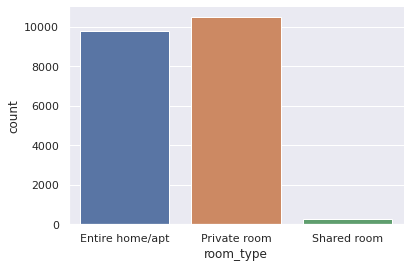

In [1714]:
sns.set(style="darkgrid")
fig, ax = plt.subplots()
sns.countplot(x="room_type", data=df_na_filtered)
sns.despine()

In [1715]:
#Drop or include the room_type
#df_na_filtered.drop(['room_type'], inplace=True, axis=1)
#df_na_filtered.head()

In [1716]:
df_na_filtered["bed_type"].unique()
bed_mapping =  {'Real Bed':'Real Bed', 
                'Others':'Others',
                'Pull-out Sofa': 'Others',
                'Couch':'Others',
                'Futon':'Others',
                'Airbed':'Others'}
df_na_filtered['bed_type']=df_na_filtered['bed_type'].map(bed_mapping)
df_na_filtered.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,total_price,distance,amenities_count,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,Hot_water,Fridge
0,1,1,1,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,200.0,30.0,1,28.0,4,1125,141,1,0,0,strict_14_with_grace_period,0,0,60.0,3.533182,29,1,1,1,0,0,1,1
2,0,1,1,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,200.0,50.0,2,20.0,62,1125,220,1,1,0,strict_14_with_grace_period,0,0,90.0,3.695677,19,1,0,1,0,0,0,0
3,0,1,1,Apartment,Private room,2,1.0,1.0,1.0,Others,250.0,30.0,1,18.0,5,360,297,1,0,0,strict_14_with_grace_period,0,0,26.0,3.755285,29,1,0,0,1,0,1,0
4,1,1,1,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,0.0,0.0,1,24.0,2,10,26,1,0,0,moderate,0,0,42.0,4.550423,13,1,0,1,0,0,1,0
5,0,1,1,Apartment,Entire home/apt,7,2.5,4.0,7.0,Real Bed,400.0,80.0,5,10.0,6,14,137,1,0,0,strict_14_with_grace_period,0,0,180.0,3.458693,37,0,1,1,0,0,1,1


In [1717]:
df_na_filtered["cancellation_policy"].unique()
cancellation_mapping =  {'strict_14_with_grace_period':'strict', 
                'flexible':'flexible',
                'moderate': 'moderate',
                'super_strict_30':'strict',
                'super_strict_60':'strict',
                'strict':'strict'}
df_na_filtered['cancellation_policy']=df_na_filtered['cancellation_policy'].map(cancellation_mapping)
df_na_filtered.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,total_price,distance,amenities_count,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,Hot_water,Fridge
0,1,1,1,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,200.0,30.0,1,28.0,4,1125,141,1,0,0,strict,0,0,60.0,3.533182,29,1,1,1,0,0,1,1
2,0,1,1,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,200.0,50.0,2,20.0,62,1125,220,1,1,0,strict,0,0,90.0,3.695677,19,1,0,1,0,0,0,0
3,0,1,1,Apartment,Private room,2,1.0,1.0,1.0,Others,250.0,30.0,1,18.0,5,360,297,1,0,0,strict,0,0,26.0,3.755285,29,1,0,0,1,0,1,0
4,1,1,1,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,0.0,0.0,1,24.0,2,10,26,1,0,0,moderate,0,0,42.0,4.550423,13,1,0,1,0,0,1,0
5,0,1,1,Apartment,Entire home/apt,7,2.5,4.0,7.0,Real Bed,400.0,80.0,5,10.0,6,14,137,1,0,0,strict,0,0,180.0,3.458693,37,0,1,1,0,0,1,1


In [1718]:
#Generate a Categorical and Numerical Column List
numerical_columns = []
categoical_columns = []
for column in df_na_filtered.columns:
    if df_na_filtered[column].dtype == 'object':
        categoical_columns.append(column)
    else:
        numerical_columns.append(column)

data_frame_for_prediction = df_na_filtered.iloc[:, :].copy(deep=True)
#You could choose to use either label encoder or one hot encoding
data_frame_for_prediction = pd.get_dummies(data_frame_for_prediction, columns=categoical_columns)
data_frame_for_prediction.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,total_price,distance,amenities_count,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,Hot_water,Fridge,property_type_Apartment,property_type_Guesthouse,property_type_Hotel,property_type_others,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Others,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,1,1,1,3,1.0,1.0,2.0,200.0,30.0,1,28.0,4,1125,141,1,0,0,0,0,60.0,3.533182,29,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1
2,0,1,1,4,1.0,1.0,2.0,200.0,50.0,2,20.0,62,1125,220,1,1,0,0,0,90.0,3.695677,19,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
3,0,1,1,2,1.0,1.0,1.0,250.0,30.0,1,18.0,5,360,297,1,0,0,0,0,26.0,3.755285,29,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1
4,1,1,1,2,1.0,1.0,2.0,0.0,0.0,1,24.0,2,10,26,1,0,0,0,0,42.0,4.550423,13,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0
5,0,1,1,7,2.5,4.0,7.0,400.0,80.0,5,10.0,6,14,137,1,0,0,0,0,180.0,3.458693,37,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,1


In [1719]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
#Split the data in to Train and Test Data:
from sklearn.model_selection import train_test_split

#columns in prediction : 
columns_in_prediction = [col for col in data_frame_for_prediction.columns if col != "total_price"]
X_train, X_test, y_train, y_test = train_test_split(data_frame_for_prediction[columns_in_prediction], data_frame_for_prediction['total_price'], test_size=0.2)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2
print(f"r2: {round(r2, 4)}")
print("{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

# importance = regressor.coef_
# # # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()
# data_frame_for_prediction.head()

r2: 0.078
173.32752051184218


<h1> Data Engineering </h1>

42
count    20560.000000
mean        67.202335
std        220.689925
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       8600.000000
Name: total_price, dtype: float64


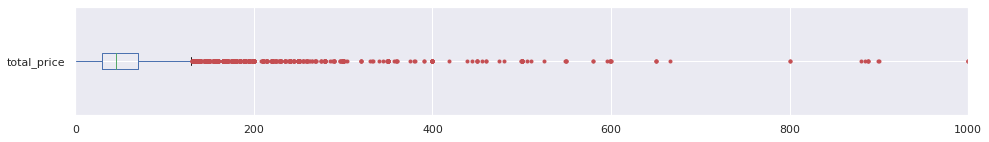

In [1720]:
#lets start with prices
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
data_frame_for_prediction['total_price'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2))
df_prices = data_frame_for_prediction[ (data_frame_for_prediction.total_price > 1000) | (data_frame_for_prediction.total_price == 0) ]
print(len(df_prices))
print(data_frame_for_prediction['total_price'].describe())

In [1721]:
#we will drop all the columns that are going to be beyond 2500 unit price range, this is an feature engineering test and can be optinally tested
data_frame_for_prediction.drop(data_frame_for_prediction[ (data_frame_for_prediction.total_price > 1000) | (data_frame_for_prediction.total_price == 0) ].index, axis=0, inplace=True)

<Figure size 432x288 with 0 Axes>

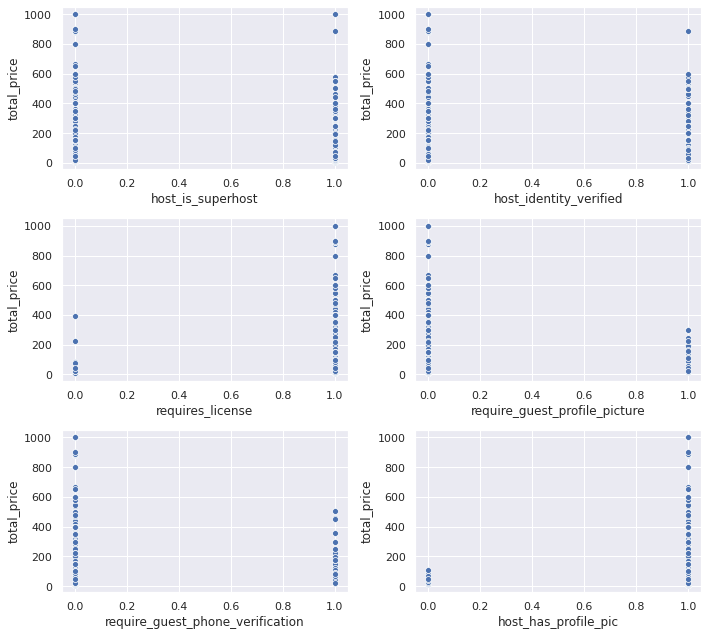

In [1722]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
sns.scatterplot(x='host_is_superhost', y= 'total_price', data = data_frame_for_prediction,ax= axarr[0, 0])
sns.scatterplot(x='host_identity_verified', y= 'total_price', data = data_frame_for_prediction,ax= axarr[0, 1])
sns.scatterplot(x='requires_license', y= 'total_price', data = data_frame_for_prediction,ax= axarr[1, 0])
sns.scatterplot(x='require_guest_profile_picture', y= 'total_price', data = data_frame_for_prediction,ax= axarr[1, 1])
sns.scatterplot(x='require_guest_phone_verification', y= 'total_price', data = data_frame_for_prediction,ax= axarr[2, 0])
sns.scatterplot(x='host_has_profile_pic', y= 'total_price', data = data_frame_for_prediction,ax= axarr[2, 1])
plt.tight_layout()
plt.show()

In [1723]:
data_frame_for_prediction.drop(["host_is_superhost",
                                "host_identity_verified", 
                                "require_guest_profile_picture",
                                "require_guest_phone_verification"], inplace=True, axis=1)

In [1724]:
#Prepare the Training Data:
from sklearn.preprocessing import StandardScaler
#columns in prediction : 
columns_in_prediction = [col for col in data_frame_for_prediction.columns if col != "total_price"]
X_train, X_test, y_train, y_test = train_test_split(data_frame_for_prediction[columns_in_prediction], data_frame_for_prediction['total_price'], test_size=0.2)

#scale all the values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)
    

In [1725]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2
print(f"r2: {round(r2, 4)}")
print("{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

r2: 0.4271
36.850301571780506


In [1726]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=5,verbose=1,random_state=0,n_estimators=200,n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"r2: {round(r2, 4)}")
print("{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s


r2: 0.4497
36.1165639005237


[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.0s finished


In [1727]:
#Dropping the amenities and check the prediction
df_without_ammenities = data_frame_for_prediction.drop(amenities_columns, inplace=False, axis=1).copy(deep=True)

In [1728]:
df_without_ammenities.head()

,host_has_profile_pic,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,requires_license,instant_bookable,is_business_travel_ready,total_price,distance,amenities_count,property_type_Apartment,property_type_Guesthouse,property_type_Hotel,property_type_others,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Others,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,1,3,1.0,1.0,2.0,200.0,30.0,1,28.0,4,1125,141,1,0,0,60.0,3.533182,29,0,1,0,0,1,0,0,0,1,0,0,1
2,1,4,1.0,1.0,2.0,200.0,50.0,2,20.0,62,1125,220,1,1,0,90.0,3.695677,19,1,0,0,0,1,0,0,0,1,0,0,1
3,1,2,1.0,1.0,1.0,250.0,30.0,1,18.0,5,360,297,1,0,0,26.0,3.755285,29,1,0,0,0,0,1,0,1,0,0,0,1
4,1,2,1.0,1.0,2.0,0.0,0.0,1,24.0,2,10,26,1,0,0,42.0,4.550423,13,1,0,0,0,0,1,0,0,1,0,1,0
5,1,7,2.5,4.0,7.0,400.0,80.0,5,10.0,6,14,137,1,0,0,180.0,3.458693,37,1,0,0,0,1,0,0,0,1,0,0,1


r2: 0.3997
37.64318168036634


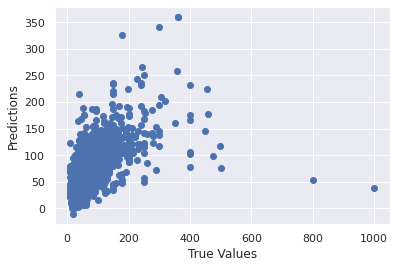

In [1729]:
#columns in prediction : 
columns_in_prediction = [col for col in df_without_ammenities.columns if col != "total_price"]
X_train, X_test, y_train, y_test = train_test_split(df_without_ammenities[columns_in_prediction], df_without_ammenities['total_price'], test_size=0.2)
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2
print(f"r2: {round(r2, 4)}")
print("{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [1730]:
import xgboost as xgb
training_set = xgb.DMatrix(X_train, label=y_train)
testing_set = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'eta': 0.3
}

evals = [(testing_set, 'eval'), (training_set, 'train')]
rounds = 10
model = xgb.train(params, training_set, rounds, evals)

[0]	eval-rmse:59.10091	train-rmse:61.53936
[1]	eval-rmse:49.23273	train-rmse:50.06712
[2]	eval-rmse:43.46866	train-rmse:42.74079
[3]	eval-rmse:40.04701	train-rmse:37.94389
[4]	eval-rmse:37.98274	train-rmse:34.84578
[5]	eval-rmse:37.15399	train-rmse:33.04196
[6]	eval-rmse:36.58868	train-rmse:31.67510
[7]	eval-rmse:36.27410	train-rmse:30.69752
[8]	eval-rmse:35.93309	train-rmse:29.94929
[9]	eval-rmse:35.87645	train-rmse:29.32479


In [1731]:
#K-fold Validation :
from sklearn.model_selection import KFold as kf
from sklearn.preprocessing import StandardScaler
df_kfold = data_frame_for_prediction.copy(deep=True)


# model = LinearRegression()  
model = RandomForestRegressor(max_depth=5,verbose=1,random_state=0,n_estimators=200,n_jobs=-1)

#columns in prediction :
y = df_kfold['total_price'].copy(deep=True)
df_kfold.drop(['total_price'], inplace=True, axis=1)
X =  df_kfold


#scale all the values
sc = StandardScaler()
kf = KFold(n_splits=5, random_state=None, shuffle=False)
iterationCount = 1
accuracy_model = []
for train_index, test_index in kf.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test =  X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = sc.fit_transform(X_train)
        X_test  = sc.fit_transform(X_test)

        model.fit(X_train, y_train) 
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        accuracy_model.append([r2, np.sqrt(mean_squared_error(y_test, y_pred))])
        iterationCount = iterationCount + 1
        


TRAIN: [ 4104  4105  4106 ... 20515 20516 20517] TEST: [   0    1    2 ... 4101 4102 4103]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


TRAIN: [    0     1     2 ... 20515 20516 20517] TEST: [4104 4105 4106 ... 8205 8206 8207]


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


TRAIN: [    0     1     2 ... 20515 20516 20517] TEST: [ 8208  8209  8210 ... 12309 12310 12311]


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


TRAIN: [    0     1     2 ... 20515 20516 20517] TEST: [12312 12313 12314 ... 16412 16413 16414]


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


TRAIN: [    0     1     2 ... 16412 16413 16414] TEST: [16415 16416 16417 ... 20515 20516 20517]


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.0s finished


In [1732]:
for (r, rmse) in accuracy_model:
    print("R2 = {}  RMSE= {}".format(round(r,2), round(rmse,2)))

R2 = 0.35  RMSE= 40.06
R2 = 0.47  RMSE= 35.37
R2 = 0.37  RMSE= 40.09
R2 = 0.1  RMSE= 42.42
R2 = 0.24  RMSE= 55.58


<h1> Heavy Running Code </h1>

In [1733]:
columns_in_prediction = [col for col in data_frame_for_prediction.columns if col != "total_price"]
X_train, X_test, y_train, y_test = train_test_split(data_frame_for_prediction[columns_in_prediction], data_frame_for_prediction['total_price'], test_size=0.2)

In [1734]:
from sklearn.model_selection import GridSearchCV
booster = xgb.XGBRegressor()
# create Grid
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned random forest
booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

# train the tuned random forest
booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

{'colsample_bytree': 0.6, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}


In [1735]:
# instantiate xgboost with best parameters
booster = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, 
                           max_depth=6, n_estimators=200, random_state=4)

# train
booster.fit(X_train, y_train)

# predict
y_pred_train = booster.predict(X_train)
y_pred_test = booster.predict(X_test)

RMSE: 37.2265


In [1737]:
r2 = r2_score(y_test, y_pred_test)
r2
print(f"r2: {round(r2, 4)}")
print("{}".format(mean_squared_error(y_test, y_pred_test)))

r2: 0.5125
1385.8138767210226


In [ ]:
# # plt.scatter(x='host_is_superhost', y= 'total_price', data = data_frame_for_prediction)
# sns.boxplot(y = 'total_price', data = data_frame_for_prediction, x = "host_is_superhost")